In [1]:
import pandas as pd

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sub_df = pd.read_csv('./sample_submission.csv')

In [2]:
# X_range = X_max - X_min
# Y_range = Y_max - Y_min

def maxmin(data):
    data['X_range'] = data['X_Maximum'] - data['X_Minimum']
    data['Y_range'] = data['Y_Maximum'] - data['Y_Minimum']
    data = data.drop(['X_Maximum','X_Minimum','Y_Maximum','Y_Minimum'], axis = 1)
    return data
# lumino_range = 'Maximum_of_Luminosity'-'Minimum_of_Luminosity'
def lumino_range(data):
    data['Luminosity_Range'] = data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity']
    data = data.drop(['Minimum_of_Luminosity','Maximum_of_Luminosity'], axis = 1)
    return data
def typeofsteel(data):
    steel_type = data[['TypeOfSteel_A300','TypeOfSteel_A400']]
    steel = []
    for i in range(len(steel_type)-1):
        if steel_type['TypeOfSteel_A300'][i] == 1:
            steel.append(0)
        elif steel_type['TypeOfSteel_A300'][i] == 0:
            steel.append(1)
    
    # print(f'{data}:', steel)
        #steel.drop([i], axis = 0, inplace=True)
    df = pd.DataFrame(steel)
    df.columns = ['TypeOfSteel']
    df.reset_index()
    data.reset_index()
    #print(df)
    data = pd.concat([data, df], axis = 1)
    data.drop(['TypeOfSteel_A300','TypeOfSteel_A400'], axis = 1, inplace=True )
    
    return data

In [3]:
for i in range(len(train_df)-1):
    if ((train_df['TypeOfSteel_A300'][i] == 1) & (train_df['TypeOfSteel_A400'][i]) == 1) == True:
        train_df.drop([i], axis = 0, inplace = True)
        train_df.reset_index(drop= True, inplace = True)
        
train_df[['TypeOfSteel_A300','TypeOfSteel_A400']] = train_df[['TypeOfSteel_A300','TypeOfSteel_A400']]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19218 entries, 0 to 19217
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19218 non-null  int64  
 1   X_Minimum              19218 non-null  int64  
 2   X_Maximum              19218 non-null  int64  
 3   Y_Minimum              19218 non-null  int64  
 4   Y_Maximum              19218 non-null  int64  
 5   Pixels_Areas           19218 non-null  int64  
 6   X_Perimeter            19218 non-null  int64  
 7   Y_Perimeter            19218 non-null  int64  
 8   Sum_of_Luminosity      19218 non-null  int64  
 9   Minimum_of_Luminosity  19218 non-null  int64  
 10  Maximum_of_Luminosity  19218 non-null  int64  
 11  Length_of_Conveyer     19218 non-null  int64  
 12  TypeOfSteel_A300       19218 non-null  int64  
 13  TypeOfSteel_A400       19218 non-null  int64  
 14  Steel_Plate_Thickness  19218 non-null  int64  
 15  Ed

In [5]:
# feature engineering 
train_df = maxmin(train_df)
test_df = maxmin(test_df)

train_df = lumino_range(train_df)
test_df = lumino_range(test_df)

train_df = typeofsteel(train_df)
test_df = typeofsteel(test_df)

In [6]:
# target, feaure column 분리
test_col = test_df.columns
target_col = train_df.columns


for i in test_col:
    target_col = target_col.drop(i)
    
# target_feature 와 분리
target = train_df[target_col]
train_df = train_df.drop(target_col, axis = 1)

# 제출에 사용할 id column
passid = test_df['id']
train_df.drop(['id'], axis = 1, inplace= True)
test_df.drop(['id'], axis = 1, inplace= True)

In [7]:
three = train_df[['Edges_X_Index','Edges_Y_Index','Outside_Global_Index']]
three.describe()

,Edges_X_Index,Edges_Y_Index,Outside_Global_Index
count,19218.000000,19218.000000,19218.000000
mean,0.614749,0.831668,0.591929
std,0.222397,0.220961,0.482044
min,0.014400,0.105000,0.000000
25%,0.451600,0.655200,0.000000
50%,0.636400,0.964300,1.000000
75%,0.785700,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [8]:
# standard scaling 을 위한 label  추출
feature = train_df.columns
feature_std = feature.to_list()

feature_std.remove('TypeOfSteel')

In [9]:
# standard scaling
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(train_df[feature_std])
train_df[feature_std] = std.transform(train_df[feature_std])
test_df[feature_std] = std.transform(test_df[feature_std])

In [12]:
# auto ML
# h2o
import h2o
'''
from h2o.automl import H2OAutoML
from h2o.sklearn import H2OAutoMLEstimator
from h2o.sklearn import H2OAutoMLClassifier
'''

'\nfrom h2o.automl import H2OAutoML\nfrom h2o.sklearn import H2OAutoMLEstimator\nfrom h2o.sklearn import H2OAutoMLClassifier\n'

In [13]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_412"; OpenJDK Runtime Environment (build 1.8.0_412-8u412-ga-1~22.04.1-b08); OpenJDK 64-Bit Server VM (build 25.412-b08, mixed mode)
  Starting server from /home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4qimaaok
  JVM stdout: /tmp/tmp4qimaaok/h2o_dummy_started_from_python.out
  JVM stderr: /tmp/tmp4qimaaok/h2o_dummy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.



KeyboardInterrupt



In [11]:
# train/test 데이터의 h2oframe으로 변환
train_df_h2o = h2o.H2OFrame(train_df)
test_df_h2o = h2o.H2OFrame(test_df)

train,valid = train_df_h2o.split_frame(ratios = [.8])


KeyboardInterrupt



In [ ]:
# fit을 위한 def.
# target 별로 학습된 모델 생성 -> 한곳에 모아둬야 함

def fit_h2o (idx):
    clf = H2OAutoMLClassifier(max_runtime_secs = 3600, max_models = 20)
    model = clf.fit(train[feature], train[idx])
    return model
# predict를 위한 def.
# predict_proba 확보해야 함

def predict_h2o(model):
    pred = model.predict_proba(test_df_h2o)
    return pred

In [ ]:
model_dict = {}
for idx in target:
    model = fit_h2o(idx)
    model_dict[idx] = model

model

In [ ]:
# predict_proba() return
pred_result = pd.DataFrame()
for idx in target:
    print(idx)
    pred = predict_h2o(model_dict[idx])
    y_pred = pred['p1'].as_data_frame()
    y_pred.rename(columns = {'p1': idx}, inplace = True)
    pred_result = pd.concat([pred_result, y_pred], axis = 1)
    #pred_result = pred_result.append(y_pred['p1'], ignore_index = True)
    #print(pred_result)

In [ ]:
pred_result.insert(0, 'id',passid)
pred_result.to_csv('submission_h2o.csv', index= False)
# kaggle score : 0.88514

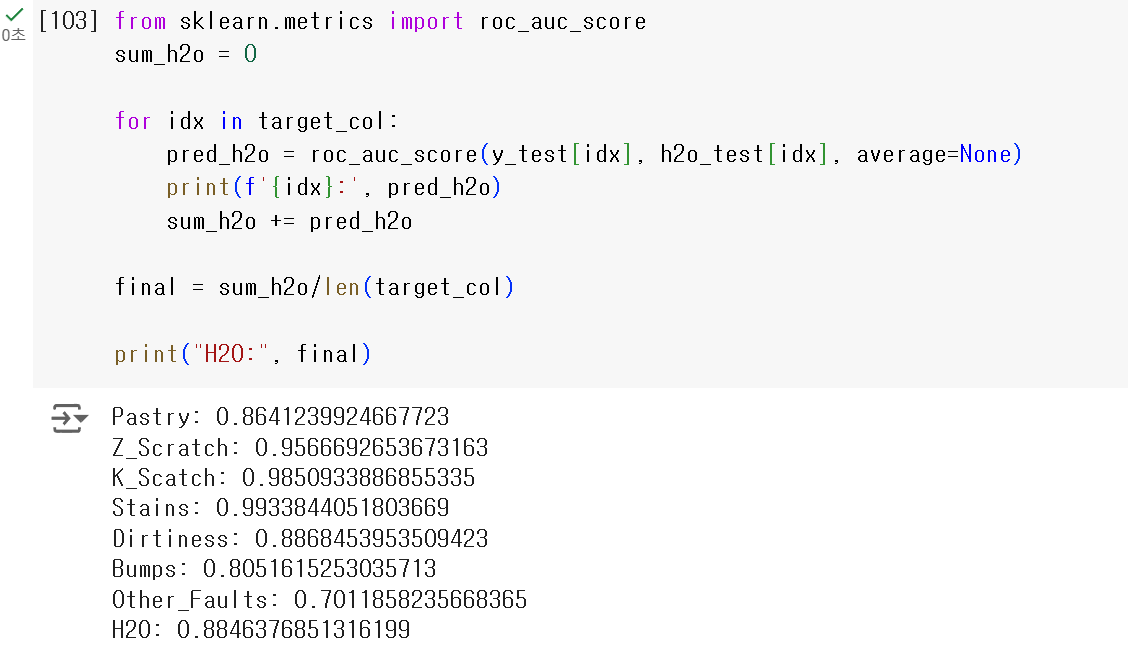

In [56]:
# auto gluon
# target feature 하나씩 나눠서 prediction 진행
from autogluon.tabular import TabularDataset, TabularPredictor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_df, target, test_size=0.2, random_state=42)

In [57]:
pred = pd.DataFrame()
atg_model = {}
for idx in target:
    label = idx
    X_train_atg = pd.concat([X_train,y_train[idx]], axis= 1)
    atg = TabularPredictor(label = label).fit(X_train_atg)
    atg_model[idx] = atg

No path specified. Models will be saved in: "AutogluonModels/ag-20240712_104054/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240712_104054/"
AutoGluon Version:  0.8.2
Python Version:     3.9.17
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
Disk Space Avail:   817.73 GB / 1081.10 GB (75.6%)
Train Data Rows:    15374
Train Data Columns: 23
Label Column: Pastry
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:   

Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    13981.14 MB
	Train Data (Original)  Memory Usage: 2.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 23 | ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Length_of_Conveyer', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 23 | ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Length

	0.0s = Fit runtime
	23 features in original data used to generate 23 features in processed data.
	Train Data (Processed) Memory Usage: 2.83 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.05s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.1, Train Rows: 13836, Val Rows: 1538
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}]

Fitting 13 L1 models ...
Fitting model: KNeighborsUnif ...
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2f2211f820>
Traceback (most recent call last):
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
	0.9844	 = Validation sco

	0.9733	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: KNeighborsDist ...
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2f396441f0>
Traceback (most recent call last):
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeE

	0.7224	 = Validation score   (accuracy)
	0.02s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: LightGBMXT ...
	0.7861	 = Validation score   (accuracy)
	0.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.7776	 = Validation score   (accuracy)
	0.65s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7744	 = Validation score   (accuracy)
	0.8s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.7789	 = Validation score   (accuracy)
	0.81s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	0.7809	 = Validation score   (accuracy)
	0.65s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.7724	 = Validation score   (accuracy)
	0.53s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.7685	 = Validation score   (accuracy)
	0.54s	 = Training   runtime
	0.1s	 = Validatio

	0.56s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 9: early stopping
	0.6853	 = Validation score   (accuracy)
	7.79s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	0.6938	 = Validation score   (accuracy)
	0.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	0.6905	 = Validation score   (accuracy)
	4.54s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge ...
	0.686	 = Validation score   (accuracy)
	1.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.7016	 = Validation score   (accuracy)
	0.56s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 21.91s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240712_104310/")


In [58]:
from sklearn.metrics import accuracy_score

for idx in target:
    acc_atg = atg_model[idx].predict(X_test)
    acc = accuracy_score(y_test[idx], acc_atg)
    print(f'{idx}:', acc)

Pastry: 0.927159209157128
Z_Scratch: 0.9521331945889698
K_Scatch: 0.963579604578564
Stains: 0.9804890738813735
Dirtiness: 0.9739854318418314
Bumps: 0.7793964620187305
Other_Faults: 0.6787200832466181


In [60]:
for idx in target:
    print(f'=========================\n{idx}\n=========================\n')
    atg_model[idx].leaderboard()

Pastry

                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   0.927178       0.003225  0.847547                0.003225           0.847547            1       True          7
1            LightGBMXT   0.927178       0.004891  0.636578                0.004891           0.636578            1       True          3
2   WeightedEnsemble_L2   0.927178       0.006714  1.188487                0.001823           0.551909            2       True         14
3               XGBoost   0.926528       0.006596  0.323406                0.006596           0.323406            1       True         11
4         LightGBMLarge   0.925878       0.003336  1.076776                0.003336           1.076776            1       True         13
5              LightGBM   0.925228       0.003106  0.620255                0.003106           0.620255            1       True          4
6        NeuralNetTorch   

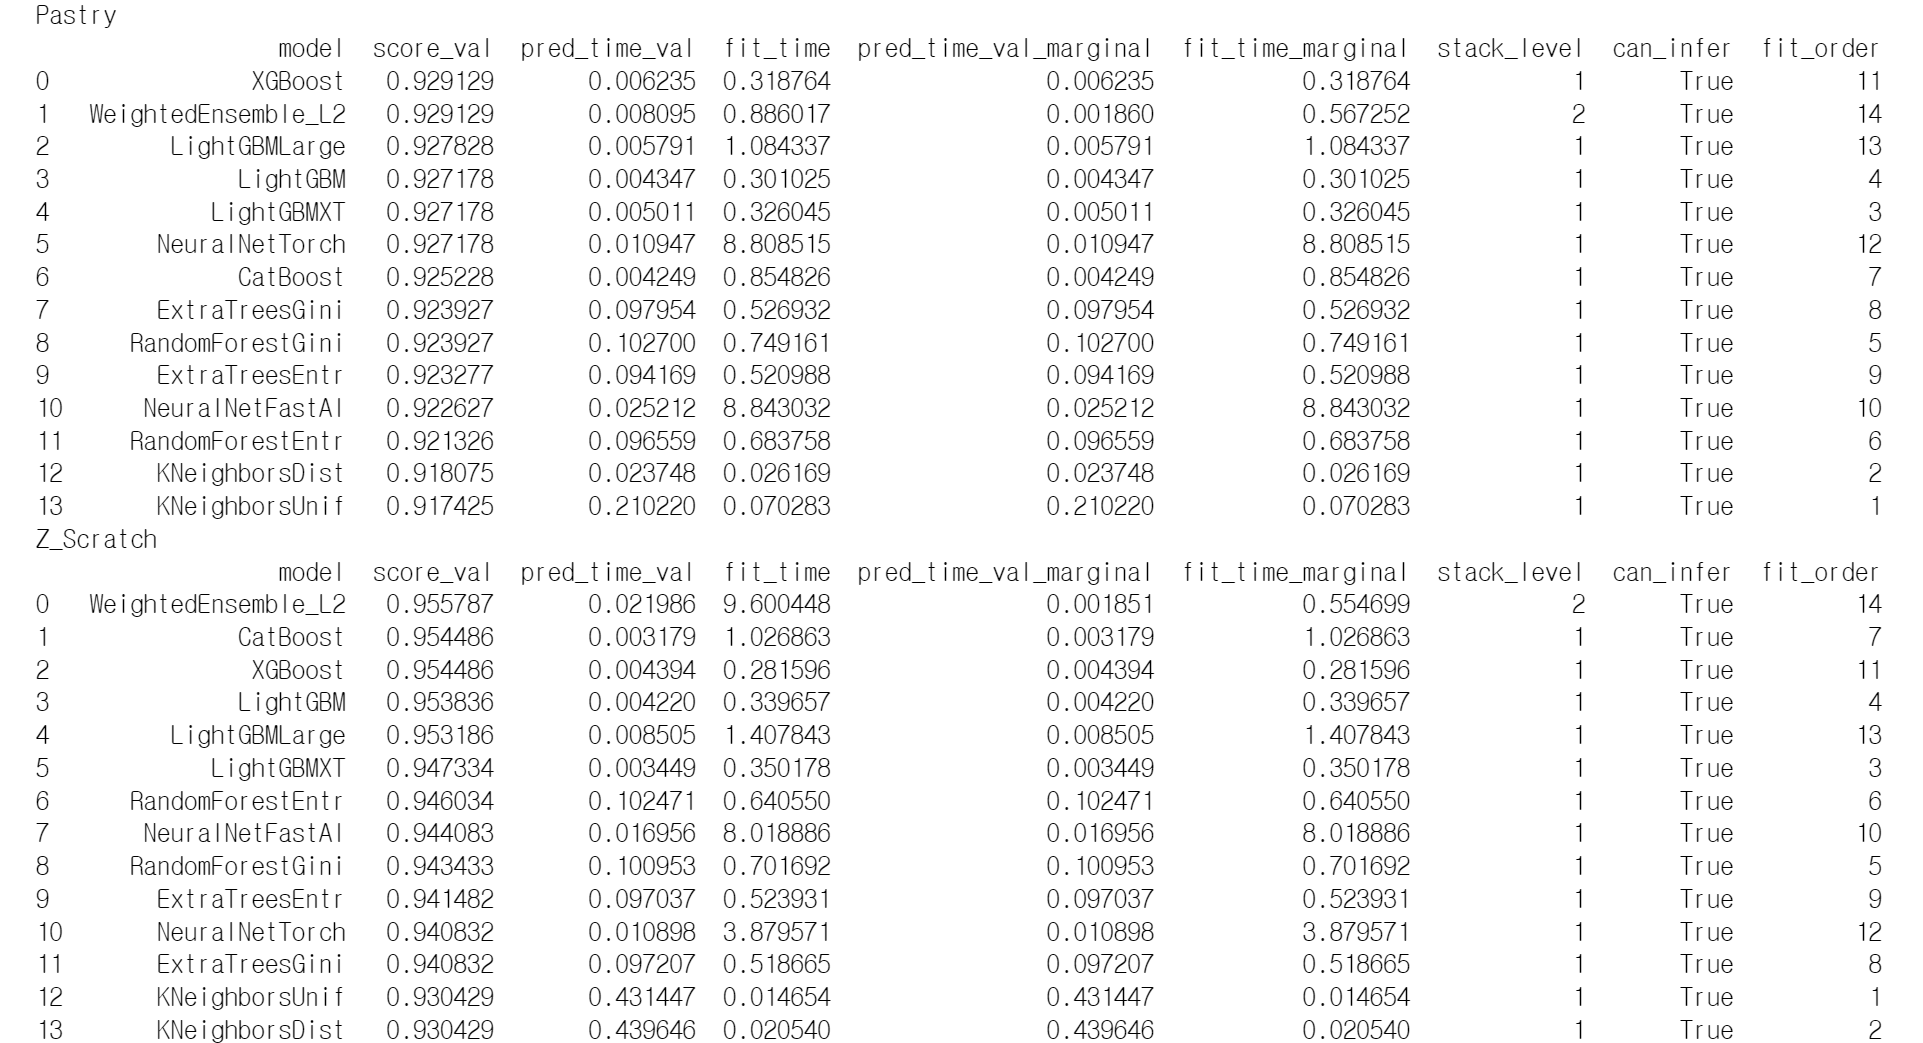
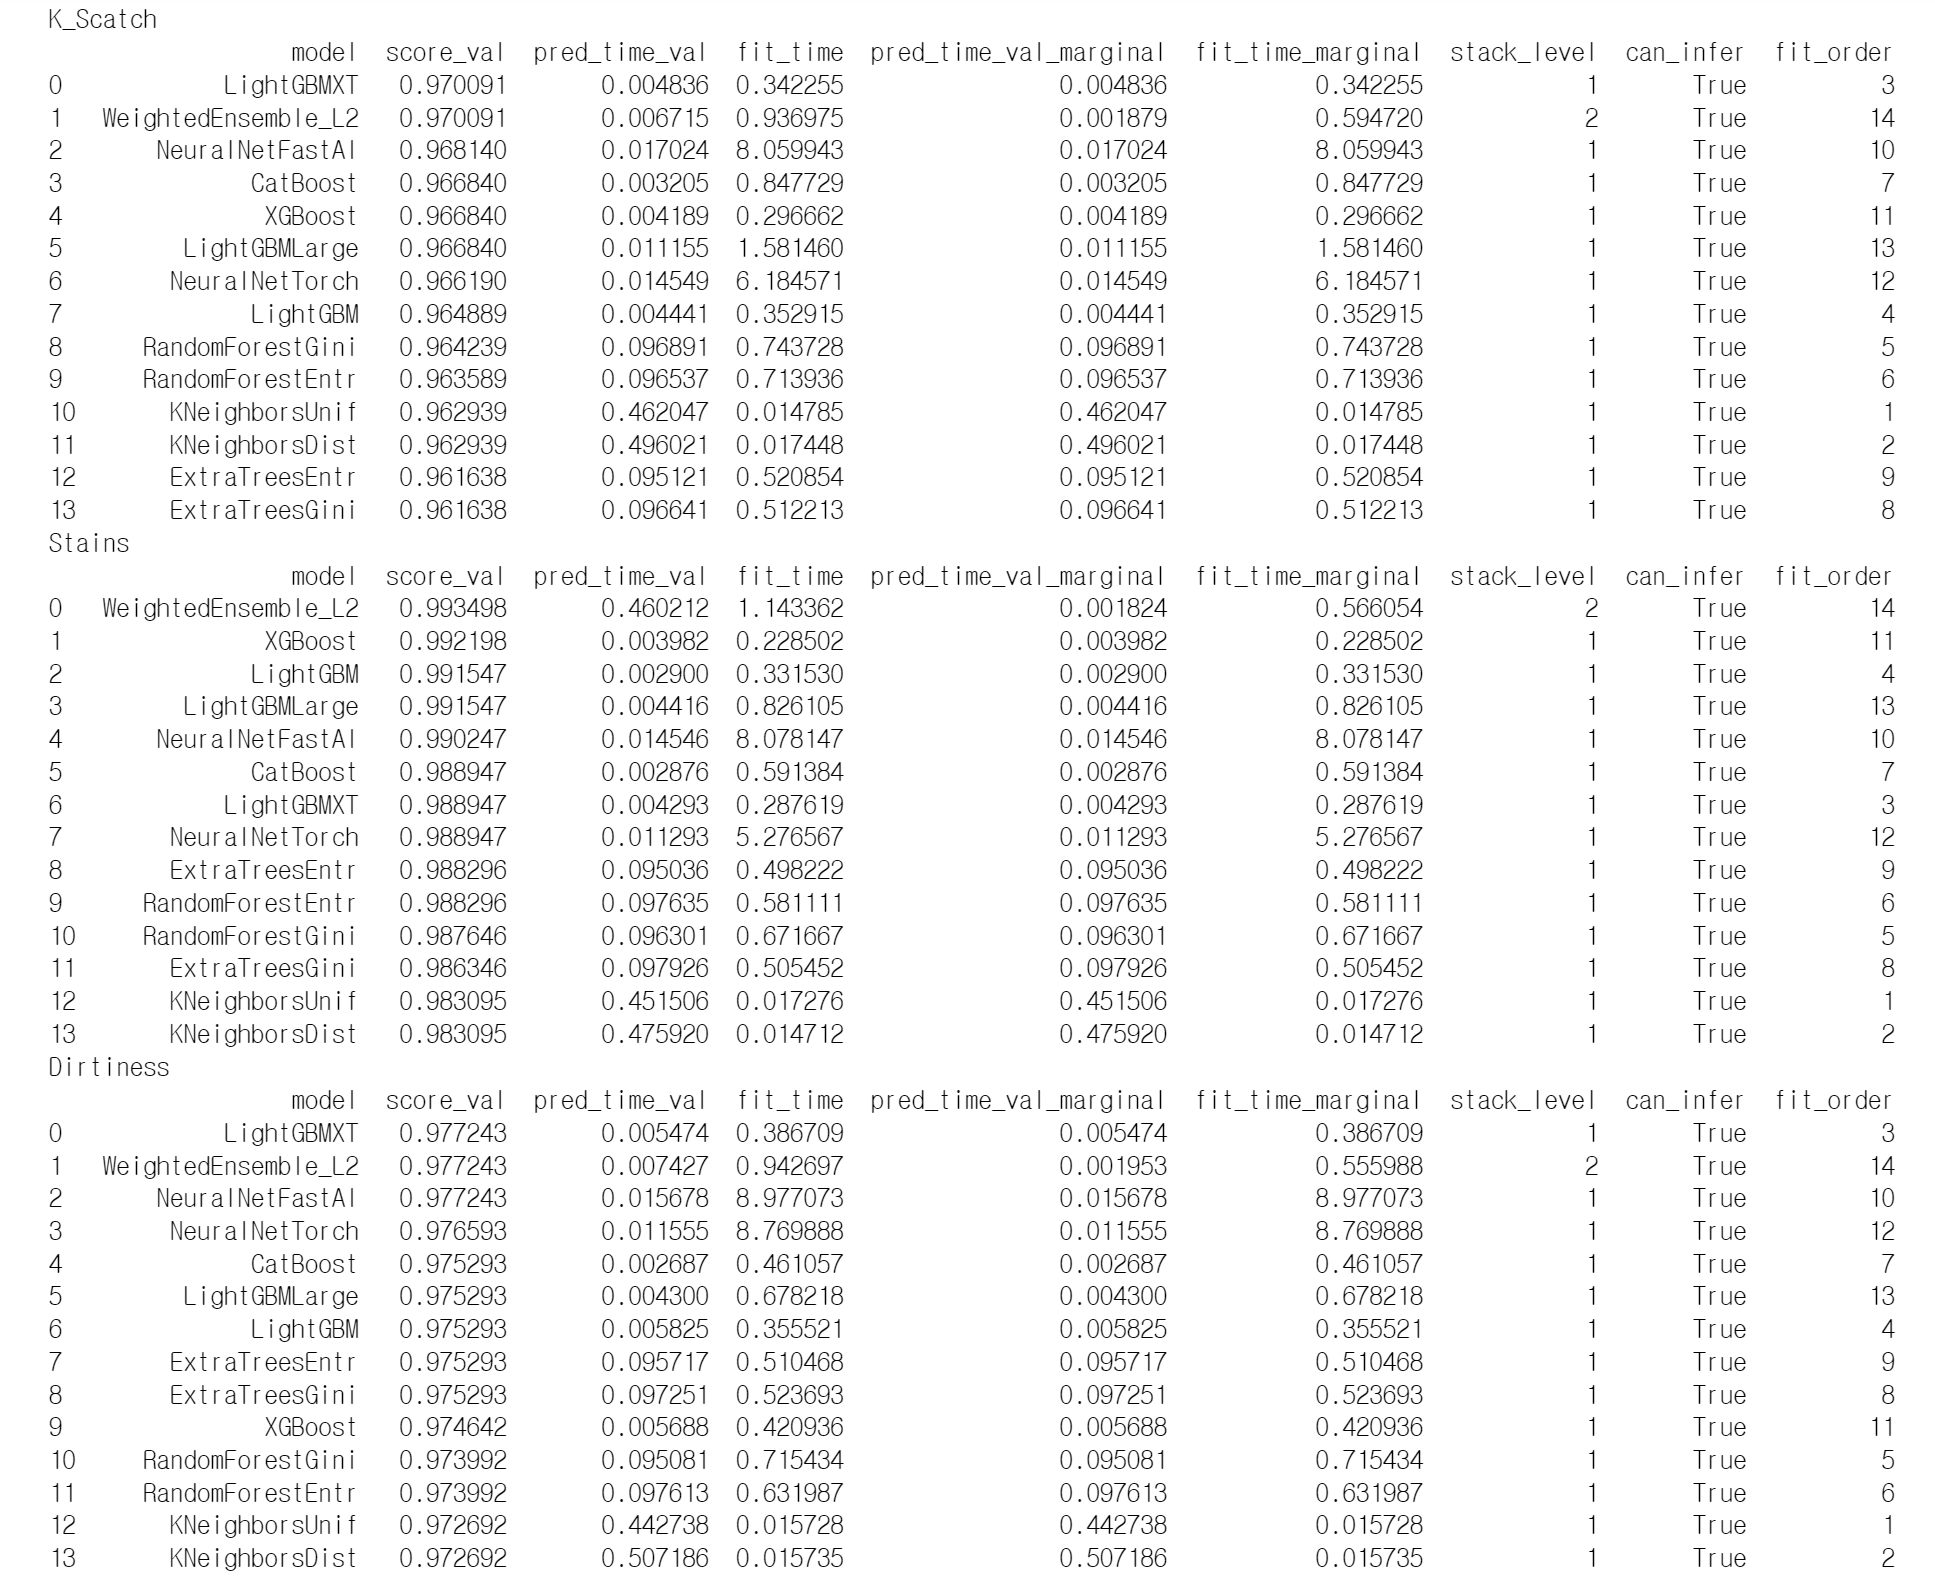
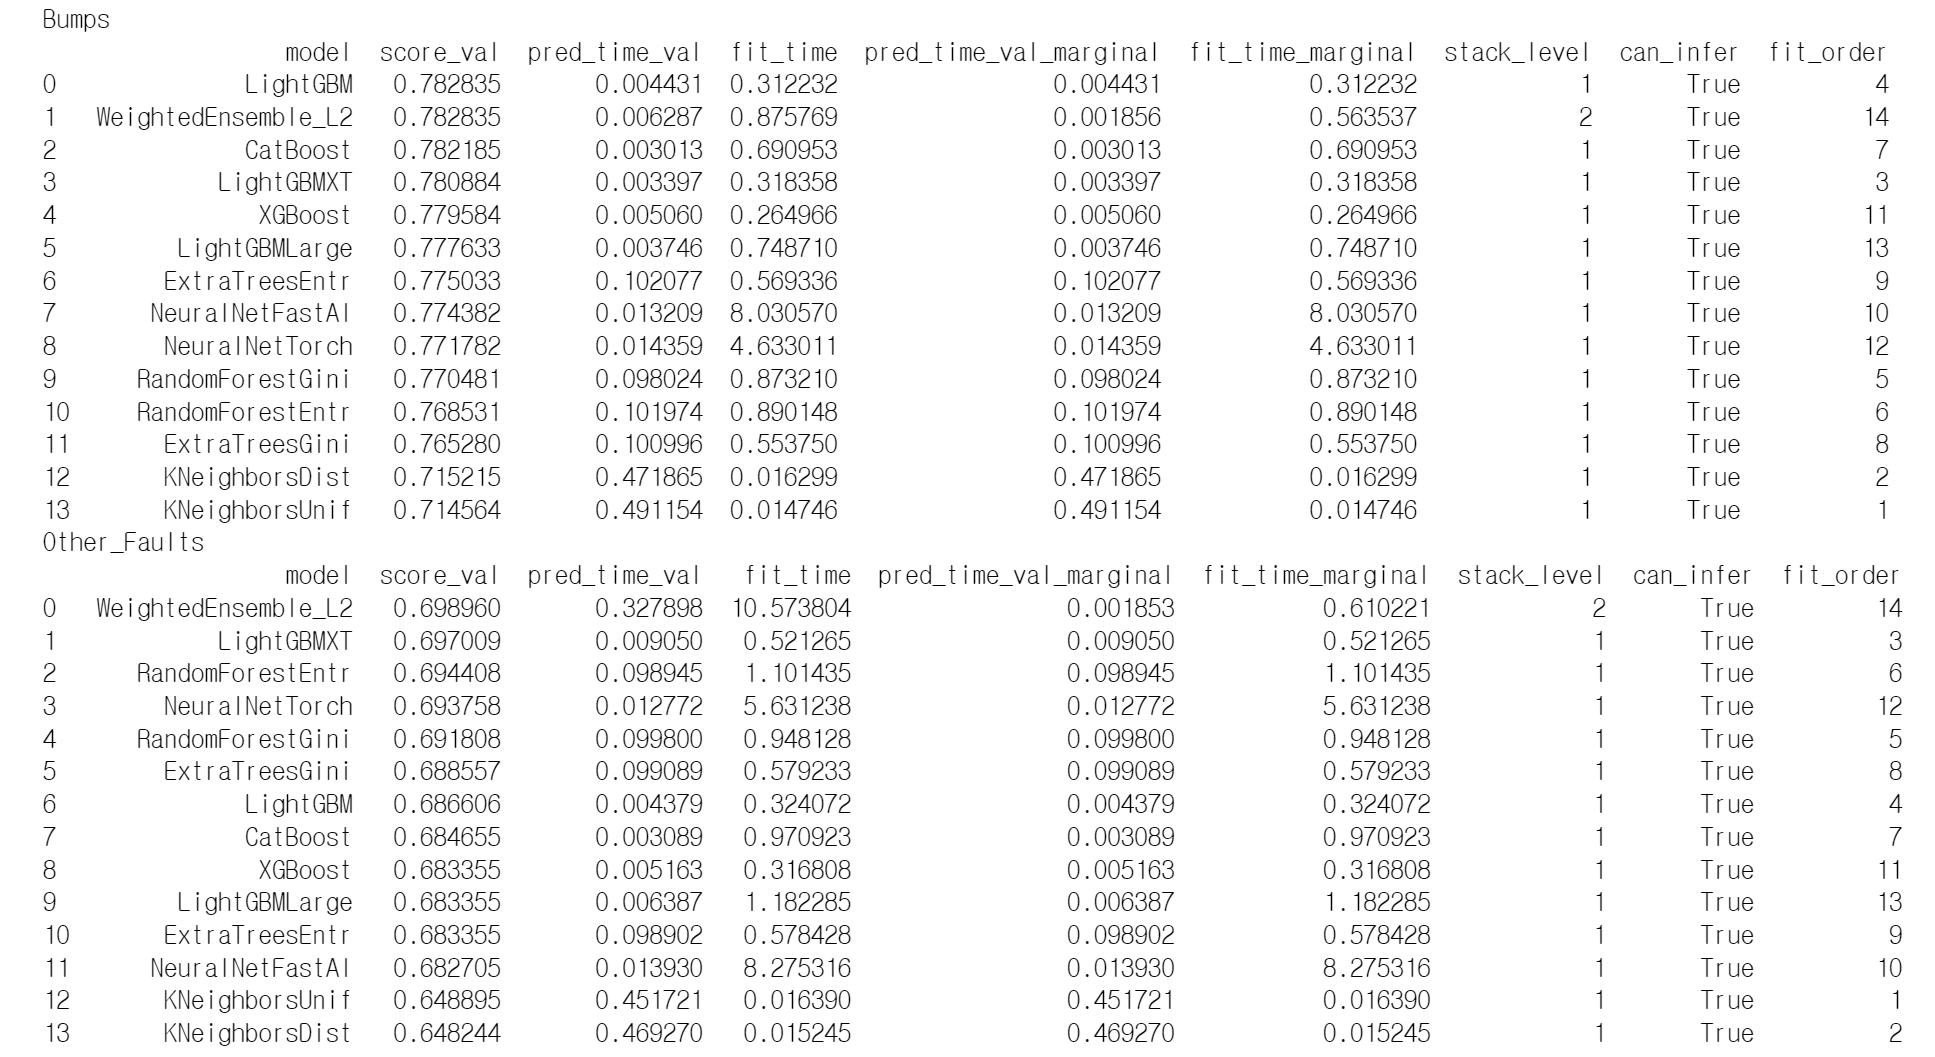

In [61]:
# local score 생성
atg_test = pd.DataFrame()

# roc-auc 곡선
for idx in target_col:
    y_sub = atg_model[idx].predict_proba(X_test)[1]
    atg_test[idx] = y_sub

In [62]:
atg_test

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
13225,0.011120,0.621319,0.003586,0.000000e+00,0.007371,0.150247,0.300385
18890,0.423977,0.082804,0.007258,2.880106e-15,0.034322,0.136309,0.348657
14044,0.001385,0.082804,0.938106,0.000000e+00,0.000517,0.000844,0.078678
3995,0.018453,0.082804,0.003191,4.746713e-09,0.008161,0.599969,0.366373
11127,0.069193,0.084222,0.013850,1.453807e-11,0.035410,0.452071,0.298435
...,...,...,...,...,...,...,...
10883,0.003577,0.085357,0.040310,1.862623e-01,0.033294,0.086958,0.526152
13871,0.050800,0.082804,0.003224,2.436094e-23,0.007885,0.670007,0.328621
9001,0.365629,0.200246,0.004422,6.750576e-34,0.015138,0.214006,0.434405
13113,0.007386,0.082804,0.003317,5.766862e-16,0.002428,0.554909,0.381653


In [64]:
from sklearn.metrics import roc_auc_score
sum_atg = 0
# sum_auk = 0

for idx in target_col:
    pred_atg = roc_auc_score(y_test[idx], atg_test[idx], average=None)
    print(f'{idx}:', pred_atg)
    sum_atg += pred_atg
    
final = sum_atg/len(target_col)

print("Auto Gluon:", final)

Pastry: 0.8664290996970919
Z_Scratch: 0.9330684943364929
K_Scatch: 0.9839570653870162
Stains: 0.9828533066820113
Dirtiness: 0.8725692470991869
Bumps: 0.8053164645597304
Other_Faults: 0.6976004633342243
Auto Gluon: 0.8773991630136793


In [17]:
from sklearn.metrics import accuracy_score
for idx in target:
    pred = atg_model[idx].predict_proba(X_test)[1]
    acc = accuracy_score(y_test[idx], pred)
    print(f'{idx}:', acc)

Pastry: 0.8022892819979188
Z_Scratch: 0.7929240374609782


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f53c3ff7280>
Traceback (most recent call last):
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


K_Scatch: 0.6932882414151925
Stains: 0.8259625390218522
Dirtiness: 0.831945889698231
Bumps: 0.6644120707596254
Other_Faults: 0.6781997918834547


In [59]:
test_atg = sub_df

for idx in target:
    pred_atg = atg_model[idx].predict_proba(test_df)[1]
    test_atg[idx] = pred_atg

test_atg.to_csv('./submission_atg.csv', index=False)
# kaggle score : 0.8815

In [10]:
# auto keras 사용을 위한 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(train_df, target, test_size=0.2, random_state=42)

In [11]:
# auto keras
import autokeras as ak
import time

start = time.time()

model_ak = {}
for idx in y_train:
    clf_ak = ak.StructuredDataClassifier(overwrite=False, max_trials=20)
    clf_ak.fit(X_train, y_train[idx], epochs = 10, batch_size = 32)
    clf_ak.evaluate(X_test, y_test[idx])
    model_ak[idx] = clf_ak

end = time.time()
print("time:", end - start)

Using TensorFlow backend


2024-07-16 15:52:40.767022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-16 15:52:41.467577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Reloading Tuner from ./structured_data_classifier/tuner0.json


2024-07-16 15:52:43.432653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-16 15:52:43.491247: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
481/481 [==============================] - 1s 909us/step - loss: 0.2377 - accuracy: 0.9186
Epoch 2/10
481/481 [==============================] - 0s 853us/step - loss: 0.2123 - accuracy: 0.9225
Epoch 3/10
481/481 [==============================] - 0s 859us/step - loss: 0.2084 - accuracy: 0.9240
Epoch 4/10
481/481 [==============================] - 0s 869us/step - loss: 0.2060 - accuracy: 0.9242
Epoch 5/10
481/481 [==============================] - 0s 852us/step - loss: 0.2043 - accuracy: 0.9246
Epoch 6/10
481/481 [==============================] - 0s 847us/step - loss: 0.2029 - accuracy: 0.9247
Epoch 7/10
481/481 [==============================] - 0s 852us/step - loss: 0.2017 - accuracy: 0.9249
Epoch 8/10
481/481 [==============================] - 0s 860us/step - loss: 0.2007 - accuracy: 0.9248
Epoch 9/10
481/481 [==============================] - 0s 860us/step - loss: 0.1998 - accuracy: 0.9249
Epoch 10/10
481/481 [==============================] - 0s 856us/step - loss: 0.198

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 912us/step - loss: 0.2026 - accuracy: 0.9274
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 888us/step - loss: 0.2055 - accuracy: 0.9344
Epoch 2/10
481/481 [==============================] - 0s 860us/step - loss: 0.1725 - accuracy: 0.9405
Epoch 3/10
481/481 [==============================] - 0s 867us/step - loss: 0.1669 - accuracy: 0.9417
Epoch 4/10
481/481 [==============================] - 0s 854us/step - loss: 0.1634 - accuracy: 0.9417
Epoch 5/10
481/481 [==============================] - 0s 860us/step - loss: 0.1607 - accuracy: 0.9422
Epoch 6/10
481/481 [==============================] - 0s 855us/step - loss: 0.1584 - accuracy: 0.9428
Epoch 7/10
481/481 [==============================] - 0s 852us/step - loss: 0.1565 - accuracy: 0.9435
Epoch 8/10
481/481 [==============================] - 0s 846us/step - loss: 0.1546 - accuracy: 0.9437
Epoch 9/10
481/481 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 938us/step - loss: 0.1694 - accuracy: 0.9373
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 948us/step - loss: 0.1720 - accuracy: 0.9448
Epoch 2/10
481/481 [==============================] - 0s 913us/step - loss: 0.1269 - accuracy: 0.9585
Epoch 3/10
481/481 [==============================] - 0s 892us/step - loss: 0.1235 - accuracy: 0.9594
Epoch 4/10
481/481 [==============================] - 0s 868us/step - loss: 0.1215 - accuracy: 0.9594
Epoch 5/10
481/481 [==============================] - 0s 870us/step - loss: 0.1200 - accuracy: 0.9593
Epoch 6/10
481/481 [==============================] - 0s 854us/step - loss: 0.1187 - accuracy: 0.9601
Epoch 7/10
481/481 [==============================] - 0s 870us/step - loss: 0.1176 - accuracy: 0.9604
Epoch 8/10
481/481 [==============================] - 0s 906us/step - loss: 0.1166 - accuracy: 0.9608
Epoch 9/10
481/481 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 932us/step - loss: 0.1238 - accuracy: 0.9610
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 1ms/step - loss: 0.0946 - accuracy: 0.9712
Epoch 2/10
481/481 [==============================] - 0s 893us/step - loss: 0.0445 - accuracy: 0.9826
Epoch 3/10
481/481 [==============================] - 0s 876us/step - loss: 0.0397 - accuracy: 0.9839
Epoch 4/10
481/481 [==============================] - 0s 862us/step - loss: 0.0370 - accuracy: 0.9850
Epoch 5/10
481/481 [==============================] - 0s 861us/step - loss: 0.0352 - accuracy: 0.9855
Epoch 6/10
481/481 [==============================] - 0s 857us/step - loss: 0.0338 - accuracy: 0.9860
Epoch 7/10
481/481 [==============================] - 0s 883us/step - loss: 0.0328 - accuracy: 0.9864
Epoch 8/10
481/481 [==============================] - 0s 859us/step - loss: 0.0319 - accuracy: 0.9867
Epoch 9/10
481/481 [=============

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 931us/step - loss: 0.0418 - accuracy: 0.9831
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 893us/step - loss: 0.1124 - accuracy: 0.9751
Epoch 2/10
481/481 [==============================] - 0s 853us/step - loss: 0.0926 - accuracy: 0.9755
Epoch 3/10
481/481 [==============================] - 0s 852us/step - loss: 0.0900 - accuracy: 0.9755
Epoch 4/10
481/481 [==============================] - 0s 849us/step - loss: 0.0882 - accuracy: 0.9756
Epoch 5/10
481/481 [==============================] - 0s 905us/step - loss: 0.0867 - accuracy: 0.9755
Epoch 6/10
481/481 [==============================] - 0s 873us/step - loss: 0.0855 - accuracy: 0.9758
Epoch 7/10
481/481 [==============================] - 0s 862us/step - loss: 0.0844 - accuracy: 0.9761
Epoch 8/10
481/481 [==============================] - 0s 865us/step - loss: 0.0833 - accuracy: 0.9763
Epoch 9/10
481/481 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 938us/step - loss: 0.0972 - accuracy: 0.9729
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 874us/step - loss: 0.4904 - accuracy: 0.7452
Epoch 2/10
481/481 [==============================] - 0s 847us/step - loss: 0.4623 - accuracy: 0.7632
Epoch 3/10
481/481 [==============================] - 0s 852us/step - loss: 0.4572 - accuracy: 0.7655
Epoch 4/10
481/481 [==============================] - 0s 875us/step - loss: 0.4539 - accuracy: 0.7669
Epoch 5/10
481/481 [==============================] - 0s 857us/step - loss: 0.4515 - accuracy: 0.7689
Epoch 6/10
481/481 [==============================] - 0s 850us/step - loss: 0.4496 - accuracy: 0.7708
Epoch 7/10
481/481 [==============================] - 0s 869us/step - loss: 0.4480 - accuracy: 0.7714
Epoch 8/10
481/481 [==============================] - 0s 894us/step - loss: 0.4466 - accuracy: 0.7721
Epoch 9/10
481/481 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 945us/step - loss: 0.4629 - accuracy: 0.7677
Reloading Tuner from ./structured_data_classifier/tuner0.json
Epoch 1/10
481/481 [==============================] - 1s 922us/step - loss: 0.6044 - accuracy: 0.6560
Epoch 2/10
481/481 [==============================] - 0s 881us/step - loss: 0.5915 - accuracy: 0.6644
Epoch 3/10
481/481 [==============================] - 0s 875us/step - loss: 0.5870 - accuracy: 0.6713
Epoch 4/10
481/481 [==============================] - 0s 902us/step - loss: 0.5842 - accuracy: 0.6748
Epoch 5/10
481/481 [==============================] - 0s 850us/step - loss: 0.5822 - accuracy: 0.6775
Epoch 6/10
481/481 [==============================] - 0s 864us/step - loss: 0.5807 - accuracy: 0.6797
Epoch 7/10
481/481 [==============================] - 0s 872us/step - loss: 0.5795 - accuracy: 0.6802
Epoch 8/10
481/481 [==============================] - 0s 871us/step - loss: 0.5784 - accuracy: 0.6822
Epoch 9/10
481/481 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


121/121 [==============================] - 0s 958us/step - loss: 0.6028 - accuracy: 0.6649
time: 74.7261917591095


In [12]:
from keras.models import load_model
import tensorflow as tf

model_auk = {}

for idx in target:
    kt = model_ak[idx]
    model = kt.export_model()
    model.save(f'{idx}.keras')
    model_auk[idx] = load_model(f'{idx}.keras')
    print(f'{idx}')
    print('\n===========================\n', model_auk[idx].summary())

Pastry
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

Z_Scratch
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)             

K_Scatch
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)              

Stains
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

Dirtiness
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)             

Bumps
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 

Other_Faults
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)          

In [28]:
print(newModel_auk['Pastry'].layers[-1].activation)

<function sigmoid at 0x7fa3e5fe2790>


In [29]:
newModel_auk = {}
for idx in target:
    input_layer = model_auk[idx].input
    output_p = model_auk[idx].layers[-2].output
    model_auk[idx].layers[-1] = model_auk[idx].layers[-2].activation('sigmoid')
    output_p = model_auk[idx].layers[-1].output
    
    newModel = tf.keras.models.Model(inputs= input_layer, outputs = output_p)
    newModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    newModel_auk[idx] = newModel
    print(f'{idx}')
    print('\n===========================\n', newModel_auk[idx].summary())

Pastry
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)             

 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 multi_category_encoding (M  (None, 23)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 23)                47        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 classification_head_1 (Act  (None, 1)                 0         
 ivation) 

In [30]:
test_auk = sub_df

for idx in newModel_auk:
    print(idx)
    newModel_auk[idx].fit(X_train, y_train[idx], epochs = 10, batch_size = 32)
    pred_p =  newModel_auk[idx].predict(test_df)
    
    test_auk[idx] = pred_p
# newModel.fit(X_train, y_train['Pastry'], epochs = 10, batch_size = 32)

Pastry
Epoch 1/10
481/481 [==============================] - 1s 892us/step - loss: 0.2218 - accuracy: 0.9231
Epoch 2/10
481/481 [==============================] - 0s 835us/step - loss: 0.2106 - accuracy: 0.9234
Epoch 3/10
481/481 [==============================] - 0s 845us/step - loss: 0.2070 - accuracy: 0.9236
Epoch 4/10
481/481 [==============================] - 0s 837us/step - loss: 0.2047 - accuracy: 0.9241
Epoch 5/10
481/481 [==============================] - 0s 826us/step - loss: 0.2037 - accuracy: 0.9235
Epoch 6/10
481/481 [==============================] - 0s 842us/step - loss: 0.2021 - accuracy: 0.9242
Epoch 7/10
481/481 [==============================] - 0s 843us/step - loss: 0.2007 - accuracy: 0.9244
Epoch 8/10
481/481 [==============================] - 0s 831us/step - loss: 0.1996 - accuracy: 0.9238
Epoch 9/10
481/481 [==============================] - 0s 824us/step - loss: 0.1985 - accuracy: 0.9238
Epoch 10/10
401/401 [==============================] - 0s 750us/step
Z_Scra

In [31]:
test_auk

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,5.365571e-01,0.001538,0.000664,4.141522e-07,0.027211,0.101220,0.342663
1,19220,2.032438e-01,0.027448,0.011026,2.553731e-07,0.066122,0.063402,0.543838
2,19221,1.416344e-04,0.076323,0.159080,6.017020e-05,0.005565,0.265659,0.513630
3,19222,7.919168e-02,0.019742,0.000271,1.014865e-03,0.004679,0.583433,0.196263
4,19223,1.517236e-04,0.001116,0.000233,1.241211e-03,0.012114,0.664682,0.437596
...,...,...,...,...,...,...,...,...
12809,32028,1.556727e-01,0.069458,0.003840,8.941844e-06,0.050595,0.191940,0.422322
12810,32029,1.387881e-01,0.005776,0.013963,1.968909e-03,0.313781,0.145804,0.401293
12811,32030,2.672568e-07,0.001115,0.935995,1.834984e-06,0.000006,0.000005,0.052243
12812,32031,3.779477e-01,0.001629,0.015688,3.384815e-07,0.031256,0.068882,0.428381


In [32]:
test_auk.to_csv('./submission_auk.csv', index=False)

In [87]:
# roc-auc score
from sklearn.metrics import roc_auc_score
sum_auk = 0

for idx in target_col:
    auk_test = newModel_auk[idx].predict(X_test)
    pred_auk = roc_auc_score(y_test[idx], auk_test, average=None)
    print(f'{idx}:', pred_auk)
    sum_auk += pred_auk
    
final = sum_auk/len(target_col)

print("Auto Keras:", final)

121/121 [==============================] - 0s 763us/step
Pastry: 0.8437279140163486
121/121 [==============================] - 0s 743us/step
Z_Scratch: 0.8845844753345289
121/121 [==============================] - 0s 766us/step
K_Scatch: 0.9798567220661673
121/121 [==============================] - 0s 748us/step
Stains: 0.9860509605580625
121/121 [==============================] - 0s 749us/step
Dirtiness: 0.8604547353778518
121/121 [==============================] - 0s 846us/step
Bumps: 0.7747854858380769
121/121 [==============================] - 0s 832us/step
Other_Faults: 0.6723799340639758
Auto Keras: 0.857405746750716
